<a href="https://colab.research.google.com/github/i0v01/4ID3/blob/main/LSTMEEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import torch

data = pd.read_csv('/emotions.csv')
data.head(5)

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  mean_d_1_a  \
0        4.62      30.3    -356.0      15.6      26.3       1.070       0.411   
1       28.80      33.1      32.0      25.8      22.8       6.550       1.680   
2        8.90      29.4    -416.0      16.7      23.7      79.900       3.360   
3       14.90      31.6    -143.0      19.8      24.3      -0.584      -0.284   
4       28.30      31.3      45.2      27.3      24.5      34.800      -5.790   

   mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  fft_742_b  fft_743_b  \
0      -15.70        2.06        3.15  ...       23.5       20.3       20.3   
1        2.88        3.83       -4.82  ...      -23.3      -21.8      -21.8   
2       90.20       89.90        2.03  ...      462.0     -233.0     -233.0   
3        8.82        2.30       -1.97  ...      299.0     -243.0     -243.0   
4        3.06       41.40        5.52  ...       12.0       38.1       38.1   

   fft_744_b  fft_745_b  fft_746_b  fft_747_b  fft_748_b  fft_749_b     label  
0       23.5     -215.0     280.00    -162.00    -162.00     280.00  NEGATIVE  
1      -23.3      182.0       2.57     -31.60     -31.60       2.57   NEUTRAL  
2      462.0     -267.0     281.00    -148.00    -148.00     281.00  POSITIVE  
3      299.0      132.0     -12.40       9.53       9.53     -12.40  POSITIVE  
4       12.0      119.0     -17.60      23.90      23.90     -17.60   NEUTRAL  

[5 rows x 2549 columns]

In [3]:
##check if gpu is available
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [4]:
data.shape

(830, 2549)

In [5]:
# check for missing value
data.loc[data.isnull().any(axis=1)]

# mean_0_a  mean_1_a  mean_2_a  mean_3_a  mean_4_a  mean_d_0_a  \
829        18.5      27.8    -138.0      19.4      29.6      -0.363   

     mean_d_1_a  mean_d_2_a  mean_d_3_a  mean_d_4_a  ...  fft_741_b  \
829       0.612       -47.1       -1.36       -5.28  ...        NaN   

     fft_742_b  fft_743_b  fft_744_b  fft_745_b  fft_746_b  fft_747_b  \
829        NaN        NaN        NaN        NaN        NaN        NaN   

     fft_748_b  fft_749_b  label  
829        NaN        NaN    NaN  

[1 rows x 2549 columns]

<Axes: xlabel='label'>

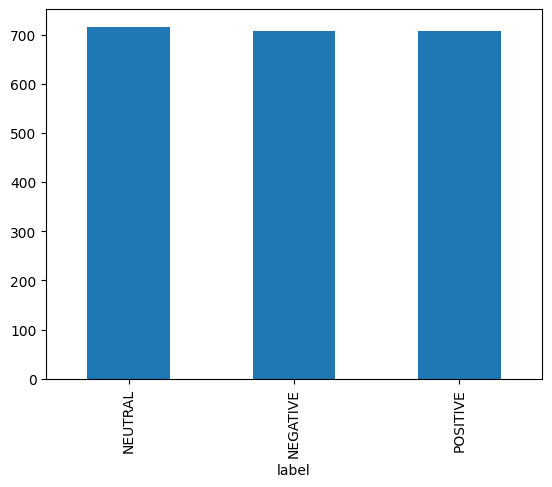

In [7]:
# check for the data balance
data.label.value_counts().plot(kind='bar')

In [9]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
# there are too many features, perform pca for potential dimenality reduction
imputer = SimpleImputer(strategy='mean')

data_imputed = imputer.fit_transform(data.drop('label', axis=1))

# Convert the imputed data back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data.drop('label', axis=1).columns)

# Now apply PCA to the imputed data
pca = PCA(10).fit(data_imputed)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.75657064e-01, 1.29330587e-02, 8.14220562e-03, 3.26557275e-03,
       1.81477609e-06, 2.60205039e-07, 1.39844567e-08, 3.91524822e-09,
       3.52029558e-09, 1.49335275e-09])

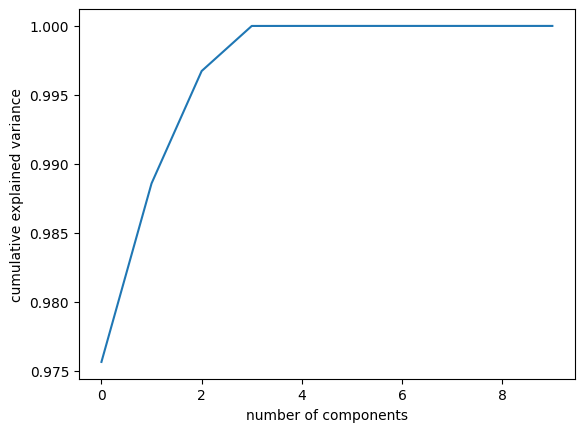

In [10]:
import matplotlib.pyplot as plt
import numpy as np
# plot
plt.plot(np.cumsum(explained_variance))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [6]:
# preprocssing
# Convert labels to numerical values
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
data['label'] = data['label'].map(label_mapping)

In [7]:
fft_data = data.loc[:,'fft_0_a':'fft_749_a']
fft_data.head(5)

fft_0_a  fft_1_a  fft_2_a  fft_3_a  fft_4_a  fft_5_a  fft_6_a  fft_7_a  \
0   -520.0   398.00   -201.0   -201.0   398.00    -52.2   121.00    -64.0   
1     66.2    -4.30     43.6     43.6    -4.30     66.0   -29.00     73.3   
2    -90.8   204.00    -77.1    -77.1   204.00   -488.0   415.00   -187.0   
3    119.0     6.25     10.9     10.9     6.25   -333.0   283.00   -144.0   
4     59.0    -2.37     10.8     10.8    -2.37    118.0    -1.81     26.7   

   fft_8_a  fft_9_a  ...  fft_740_a  fft_741_a  fft_742_a  fft_743_a  \
0    -64.0   121.00  ...      179.0       26.4      -12.9      -12.9   
1     73.3   -29.00  ...      184.0       17.0      -18.9      -18.9   
2   -187.0   415.00  ...     -796.0      631.0     -261.0     -261.0   
3   -144.0   283.00  ...     -474.0      439.0     -221.0     -221.0   
4     26.7    -1.81  ...       30.7       50.3     -111.0     -111.0   

   fft_744_a  fft_745_a  fft_746_a  fft_747_a  fft_748_a  fft_749_a  
0       26.4    -474.00      442.0    -222.00    -222.00      442.0  
1       17.0     189.00      -19.6      -8.37      -8.37      -19.6  
2      631.0     -86.40      176.0    -100.00    -100.00      176.0  
3      439.0     272.00      -87.7      32.40      32.40      -87.7  
4       50.3      -2.43       30.5    -152.00    -152.00       30.5  

[5 rows x 750 columns]

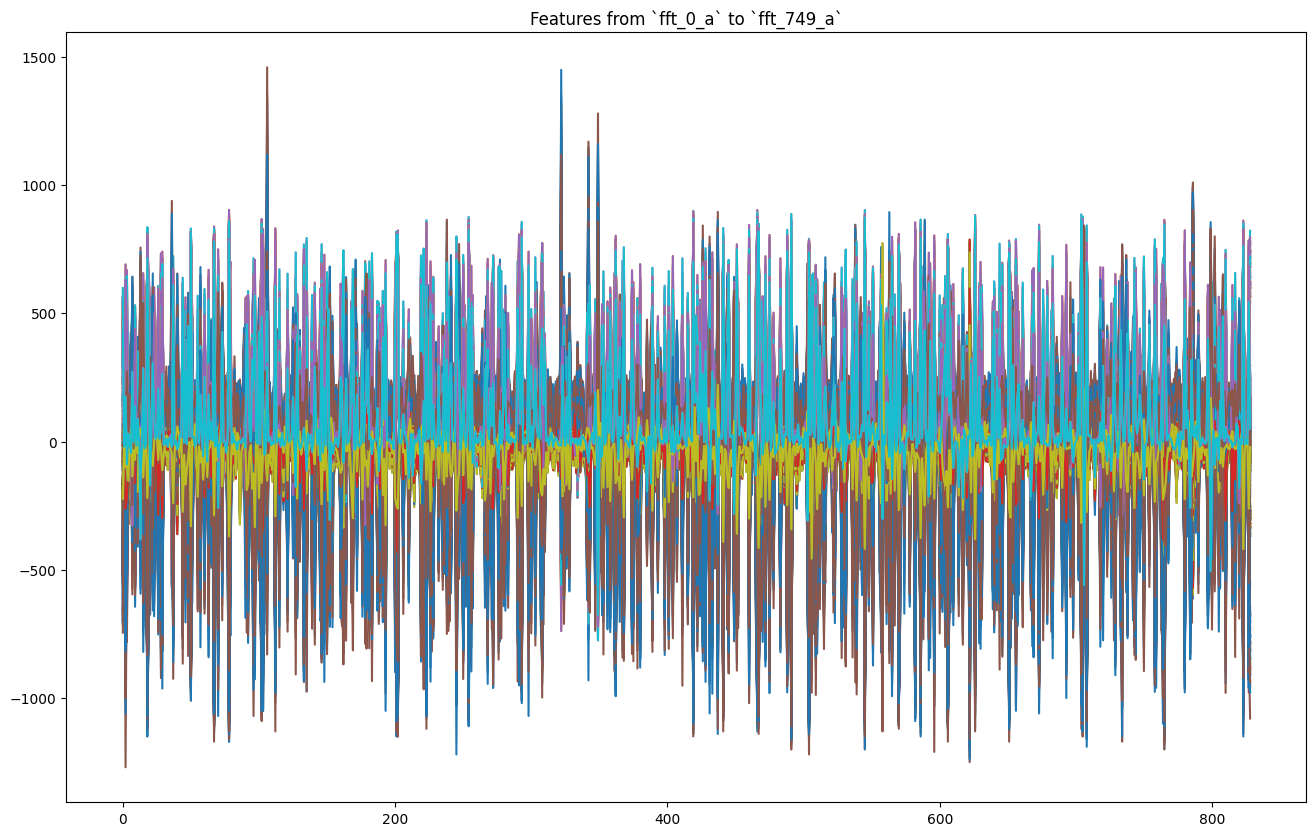

In [11]:
plt.figure(figsize=(16, 10))
plt.plot(range(len(fft_data)), fft_data)
plt.title("Features from `fft_0_a` to `fft_749_a`")
plt.show()

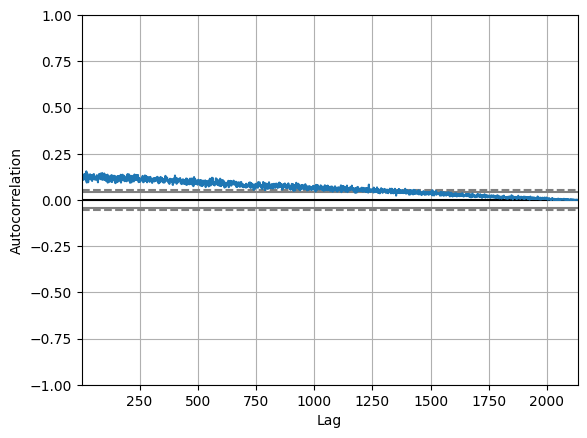

In [13]:
from pandas.plotting import autocorrelation_plot
# visulize the change in trend
autocorrelation_plot(fft_data)
plt.show()

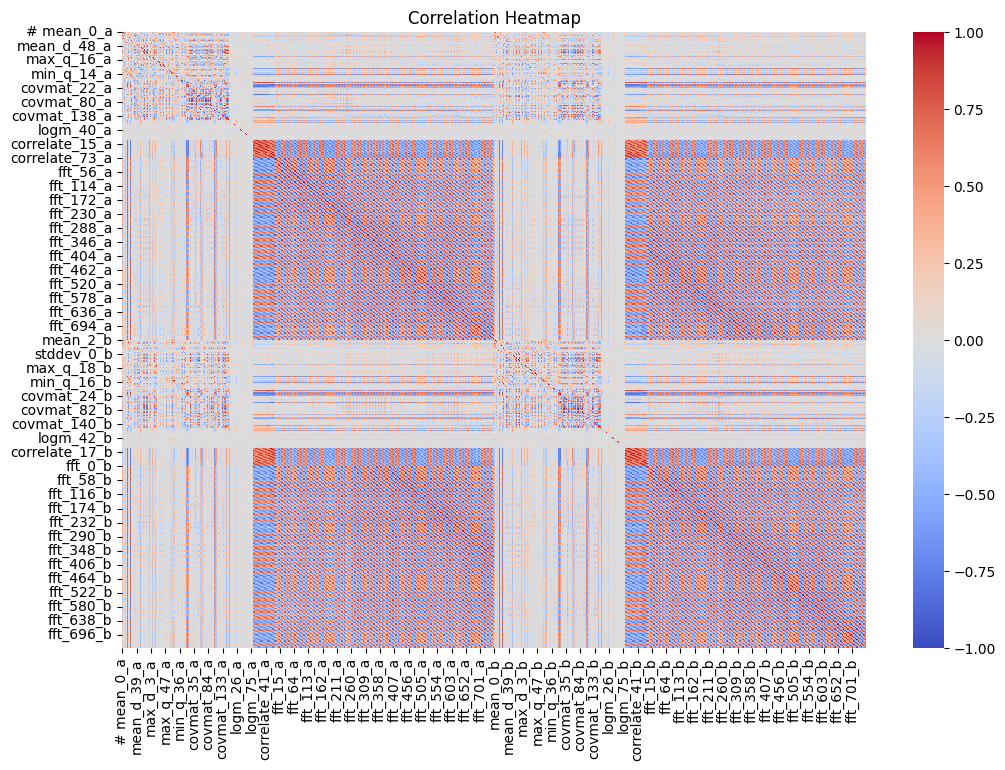

In [ ]:
import seaborn as sns
# Correlation Heatmap to help identify patterns and relationships among features.
correlation_matrix = data.drop('label', axis=1).corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
positive = data.loc[data["label"]== 2]
negative = data.loc[data["label"]== 0]
neutral = data.loc[data["label"]== 1]

<Axes: title={'center': 'fft of neutral columns'}>

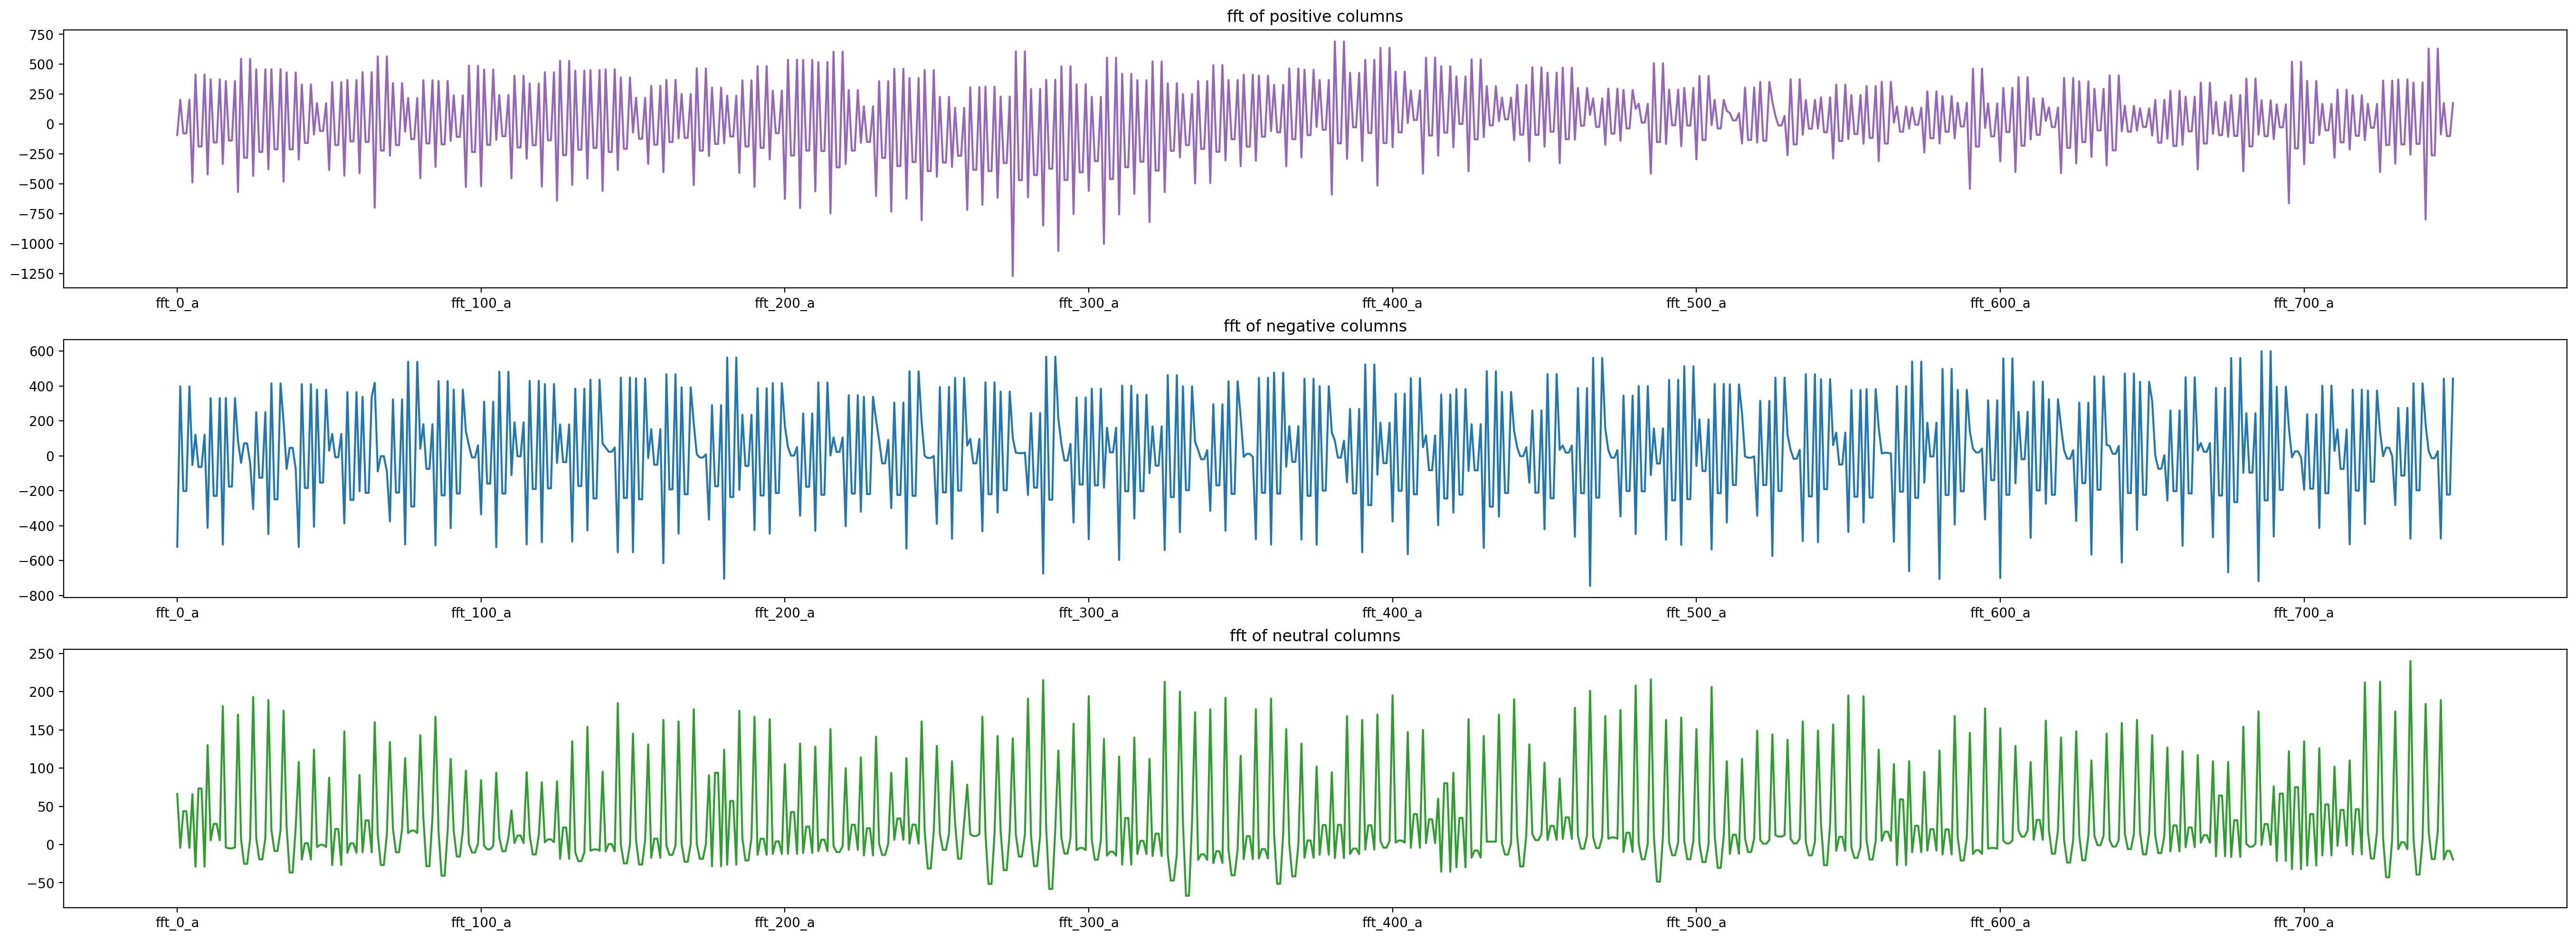

In [ ]:
fig,axes = plt.subplots(nrows=3, ncols=1, dpi=200, figsize=(34,12))

#Positive
positive.loc[2, 'fft_0_a':'fft_749_a'].plot(title='fft of positive columns', color = 'tab:purple', ax=axes[0])
#Negative
negative.loc[0, 'fft_0_a':'fft_749_a'].plot(title='fft of negative columns', color = 'tab:blue', ax=axes[1])
#Neutral
neutral.loc[1, 'fft_0_a':'fft_749_a'].plot(title='fft of neutral columns', color = 'tab:green', ax=axes[2])

In [13]:
from sklearn.model_selection import train_test_split

# Check for missing values in the 'label' column
missing_labels = data['label'].isnull().sum()
print(f"Number of missing values in 'label': {missing_labels}")

# Drop rows with missing values
data.dropna(subset=['label'], inplace=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('label', axis=1),
    data['label'],
    test_size=0.2,
    random_state=42,
    stratify=data['label']  # Ensure class distribution is maintained in splits
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Number of missing values in 'label': 1
(663, 2548) (166, 2548) (663,) (166,)


In [14]:
import tensorflow as tf

#convert to tensor

X_train_tensor = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.float32)

In [17]:
X_train_tensor.shape,X_test_tensor.shape,y_train_tensor.shape,y_test_tensor.shape

(TensorShape([1705, 2548]),
 TensorShape([427, 2548]),
 TensorShape([1705]),
 TensorShape([427]))

In [15]:
import numpy as np
X_train_np = X_train_tensor.numpy()
y_train_np = y_train_tensor.numpy()
X_test_np = X_test_tensor.numpy()
y_test_np = y_test_tensor.numpy()

In [16]:
X_train_np.shape

(663, 2548)

In [17]:
# reshape into 3D tensor
X_train_np_reshaped = X_train_np.reshape((-1,2548,1))
X_test_np_reshaped = X_test_np.reshape((-1,2548,1))

y_train_np_reshaped = y_train_np.reshape((-1,1))
y_test_np_reshaped = y_test_np.reshape((-1,1))

X_train_np_reshaped.shape,X_test_np_reshaped.shape,y_train_np_reshaped.shape,y_test_np_reshaped.shape

((663, 2548, 1), (166, 2548, 1), (663, 1), (166, 1))

In [18]:
import torch
from torch.utils.data import TensorDataset
train_dataset = TensorDataset(torch.from_numpy(X_train_np_reshaped), torch.from_numpy(y_train_np_reshaped))
test_dataset = TensorDataset(torch.from_numpy(X_test_np_reshaped), torch.from_numpy(y_test_np_reshaped))

In [21]:
from torch.utils.data import DataLoader,TensorDataset
#data loader
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
# check the shape of each batch
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([32, 2548, 1]) torch.Size([32, 1])


In [23]:
# modeling
import torch
import torch.nn as nn
class LSTM(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,num_classes=3):
    super().__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.lstm = nn.LSTM(input_size,hidden_size,num_layers,batch_first = True)
    self.fc = nn.Linear(hidden_size,num_classes) # 3 type of emotion
    self.log_softmax = nn.LogSoftmax(dim=1) # Add log_softmax layer for probability distribution


  def forward(self,x):
    batch_size = x.size(0)
    h0 = torch.zeros(self.num_layers,batch_size,self.hidden_size).to(device) #short term memory
    c0 = torch.zeros(self.num_layers,batch_size,self.hidden_size).to(device) # long term memory

    output,_ = self.lstm(x,(h0,c0))
    output = self.fc(output[:,-1,:])
    self.log_softmax(output)
    return output

model = LSTM(1,16,2) # smaller hidden size for fast computation and less risk of overfitting
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 16, num_layers=2, batch_first=True)
  (fc): Linear(in_features=16, out_features=3, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

In [43]:
def train_one_epoch(epoch):
    model.train(True)
    print(f'Epoch: {epoch + 1}')

    running_loss = 0
    correct_predictions = 0
    total_samples = 0

    for batch_idx, (x_batch, y_batch) in enumerate(train_loader):
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        # Ensure y_batch is of type long
        y_batch = y_batch.type(torch.LongTensor).squeeze(1).to(device)

        # Forward pass
        output = model(x_batch)

        # Compute loss
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        # Calculate predictions and accuracy
        _, predicted_labels = torch.max(output, 1)
        correct_predictions += (predicted_labels == y_batch).sum().item()
        total_samples += y_batch.size(0)

        # Backpropagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Calculate average loss and accuracy
    avg_loss = running_loss / len(train_loader)
    accuracy = (correct_predictions / total_samples) * 100

    print(f'Training Loss: {avg_loss:.4f}, Training Accuracy: {accuracy:.2f}%')
    return avg_loss, accuracy

In [30]:
# Validation loop
def validate_one_epoch():
    model.train(False)  # Set the model to evaluation mode
    running_loss = 0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():  # No gradients needed during validation
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)

            # Ensure y_batch is of type long
            y_batch = y_batch.type(torch.LongTensor).squeeze(1).to(device)

            # Forward pass
            output = model(x_batch)

            # Compute loss
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

            # Calculate predictions and accuracy
            _, predicted_labels = torch.max(output, 1)
            correct_predictions += (predicted_labels == y_batch).sum().item()
            total_samples += y_batch.size(0)

    # Calculate average loss and accuracy
    avg_loss = running_loss / len(test_loader)
    accuracy = (correct_predictions / total_samples) * 100

    print(f'Validation Loss: {avg_loss:.4f}, Validation Accuracy: {accuracy:.2f}%')
    return avg_loss, accuracy

In [28]:
# Training and Validation
learning_rate = 0.001
num_epochs = 5

loss_function = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


In [29]:
# Track history for visualization
history = {
    "train_loss": [],
    "train_accuracy": [],
    "val_loss": [],
    "val_accuracy": []
}

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_one_epoch(epoch)
    val_loss, val_accuracy = validate_one_epoch()

    # Save history
    history["train_loss"].append(train_loss)
    history["train_accuracy"].append(train_accuracy)
    history["val_loss"].append(val_loss)
    history["val_accuracy"].append(val_accuracy)

Epoch: 1
Training Loss: 1.0717, Training Accuracy: 45.87%
Validation Loss: 1.0152, Validation Accuracy: 61.12%
Epoch: 2
Training Loss: 0.8388, Training Accuracy: 65.04%
Validation Loss: 0.6850, Validation Accuracy: 66.51%
Epoch: 3
Training Loss: 0.6719, Training Accuracy: 68.04%
Validation Loss: 0.6294, Validation Accuracy: 68.85%
Epoch: 4
Training Loss: 0.6191, Training Accuracy: 72.55%
Validation Loss: 0.5552, Validation Accuracy: 81.50%
Epoch: 5
Training Loss: 0.5219, Training Accuracy: 81.82%
Validation Loss: 0.4653, Validation Accuracy: 83.84%


In [33]:
# meta parameter tuning
import itertools
from torch.utils.data import DataLoader

# Hyperparameter search space
hyperparams = {
    "learning_rate": [0.01, 0.001],
    "hidden_size": [16, 32],
    "num_layers": [1, 2],
    "batch_size": [16, 32],
    "dropout_rate": [0.1, 0.3]
}

In [34]:
def run_experiment(lr, hidden_size, num_layers, batch_size, dropout_rate):
    print(f"Running experiment with LR={lr}, Hidden Size={hidden_size}, Layers={num_layers}, Batch Size={batch_size}, Dropout={dropout_rate}")

    # Update dataloader with new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Define the model
    model = LSTM(input_size=1, hidden_size=hidden_size, num_layers=num_layers, num_classes=3)
    model.to(device)

    # Define loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training loop
    num_epochs = 5
    history = {"train_loss": [], "val_loss": [], "train_accuracy": [], "val_accuracy": []}
    for epoch in range(num_epochs):
        train_loss, train_accuracy = train_one_epoch(epoch)
        val_loss, val_accuracy = validate_one_epoch()
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_accuracy"].append(train_accuracy)
        history["val_accuracy"].append(val_accuracy)

    # Final evaluation
    val_loss, val_accuracy = validate_one_epoch()
    print(f"Final Validation Accuracy: {val_accuracy:.2f}%, Validation Loss: {val_loss:.4f}")
    return val_accuracy, val_loss

# Hyperparameter combinations
combinations = list(itertools.product(
    hyperparams["learning_rate"],
    hyperparams["hidden_size"],
    hyperparams["num_layers"],
    hyperparams["batch_size"],
    hyperparams["dropout_rate"]
))


In [35]:
# Run experiments
results = []
for lr, hidden_size, num_layers, batch_size, dropout_rate in combinations:
    val_accuracy, val_loss = run_experiment(lr, hidden_size, num_layers, batch_size, dropout_rate)
    results.append({
        "learning_rate": lr,
        "hidden_size": hidden_size,
        "num_layers": num_layers,
        "batch_size": batch_size,
        "dropout_rate": dropout_rate,
        "val_accuracy": val_accuracy,
        "val_loss": val_loss
    })

# Convert results to a DataFrame for analysis
import pandas as pd
results_df = pd.DataFrame(results)


Running experiment with LR=0.01, Hidden Size=16, Layers=1, Batch Size=16, Dropout=0.1
Epoch: 1
Training Loss: 0.3601, Training Accuracy: 86.86%
Validation Loss: 0.3098, Validation Accuracy: 88.29%
Epoch: 2
Training Loss: 0.3494, Training Accuracy: 86.98%
Validation Loss: 0.2949, Validation Accuracy: 88.76%
Epoch: 3
Training Loss: 0.3363, Training Accuracy: 87.86%
Validation Loss: 0.3424, Validation Accuracy: 87.59%
Epoch: 4
Training Loss: 0.3302, Training Accuracy: 87.80%
Validation Loss: 0.2893, Validation Accuracy: 88.76%
Epoch: 5
Training Loss: 0.2985, Training Accuracy: 88.86%
Validation Loss: 0.2977, Validation Accuracy: 88.06%
Validation Loss: 0.2977, Validation Accuracy: 88.06%
Final Validation Accuracy: 88.06%, Validation Loss: 0.2977
Running experiment with LR=0.01, Hidden Size=16, Layers=1, Batch Size=16, Dropout=0.3
Epoch: 1
Training Loss: 0.3061, Training Accuracy: 88.15%
Validation Loss: 0.3055, Validation Accuracy: 87.35%
Epoch: 2
Training Loss: 0.3299, Training Accuracy:

ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
# Identify the best combination
best_combination = results_df.loc[results_df['val_accuracy'].idxmax()]
print("Best Hyperparameter Combination:")
print(best_combination)

In [25]:
best_combination = {
    "learning_rate": 0.001,
    "hidden_size": 32,
    "num_layers": 2,
    "batch_size": 16,
    "dropout_rate": 0.1
}
train_loader = DataLoader(train_dataset, batch_size=best_combination["batch_size"], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_combination["batch_size"], shuffle=False)

In [26]:
# Define the model
class LSTM_tuned(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes=3, dropout_rate=0.1):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_rate)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(device)
        output, _ = self.lstm(x, (h0, c0))
        output = self.fc(output[:, -1, :])
        return self.log_softmax(output)

In [27]:
model = LSTM_tuned(
    input_size=1,
    hidden_size=best_combination["hidden_size"],
    num_layers=best_combination["num_layers"],
    dropout_rate=best_combination["dropout_rate"]
)

model.to(device)

LSTM_tuned(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True, dropout=0.1)
  (fc): Linear(in_features=32, out_features=3, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

In [32]:
# Define loss and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=best_combination["learning_rate"])

# Training loop
num_epochs = 20  # Train for a slightly longer period
history = {"train_loss": [], "val_loss": [], "train_accuracy": [], "val_accuracy": []}

for epoch in range(num_epochs):
    train_loss, train_accuracy = train_one_epoch(epoch)
    val_loss, val_accuracy = validate_one_epoch()
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_accuracy"].append(train_accuracy)
    history["val_accuracy"].append(val_accuracy)


Epoch: 1
Training Loss: 1.0450, Training Accuracy: 53.24%
Validation Loss: 0.9359, Validation Accuracy: 72.89%
Epoch: 2
Training Loss: 0.7595, Training Accuracy: 68.93%
Validation Loss: 0.5753, Validation Accuracy: 78.31%
Epoch: 3
Training Loss: 0.5221, Training Accuracy: 81.00%
Validation Loss: 0.3668, Validation Accuracy: 88.55%
Epoch: 4
Training Loss: 0.3989, Training Accuracy: 85.82%
Validation Loss: 0.3072, Validation Accuracy: 90.36%
Epoch: 5
Training Loss: 0.5240, Training Accuracy: 77.98%
Validation Loss: 0.5231, Validation Accuracy: 68.67%
Epoch: 6
Training Loss: 0.4850, Training Accuracy: 79.03%
Validation Loss: 0.3137, Validation Accuracy: 89.16%
Epoch: 7
Training Loss: 0.4203, Training Accuracy: 83.71%
Validation Loss: 0.3738, Validation Accuracy: 84.34%
Epoch: 8
Training Loss: 0.3451, Training Accuracy: 87.18%
Validation Loss: 0.2727, Validation Accuracy: 89.76%
Epoch: 9
Training Loss: 0.3492, Training Accuracy: 86.43%
Validation Loss: 0.3007, Validation Accuracy: 87.35%
E

In [35]:
from sklearn.metrics import f1_score

# final evalution
def test_model_with_f1():
    model.eval()
    correct_predictions = 0
    total_samples = 0
    running_loss = 0

    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            y_batch = y_batch.type(torch.LongTensor).squeeze(1).to(device)

            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

            _, predicted_labels = torch.max(output, 1)
            correct_predictions += (predicted_labels == y_batch).sum().item()
            total_samples += y_batch.size(0)

            # Collect targets and predictions for F1 score
            all_targets.extend(y_batch.cpu().numpy())
            all_predictions.extend(predicted_labels.cpu().numpy())

    avg_loss = running_loss / len(test_loader)
    accuracy = (correct_predictions / total_samples) * 100

    # Calculate F1 Score
    f1 = f1_score(all_targets, all_predictions, average="weighted")  # Weighted for imbalanced classes

    print(f"Test Loss: {avg_loss:.4f}")
    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Test F1 Score: {f1:.4f}")

# Run final test
test_model_with_f1()

Test Loss: 0.2421
Test Accuracy: 92.17%
Test F1 Score: 0.9213


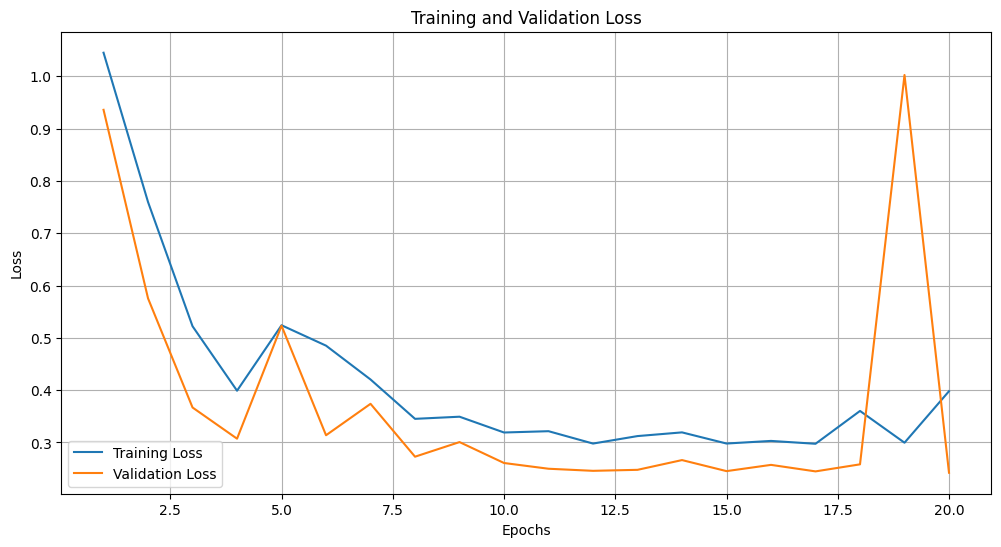

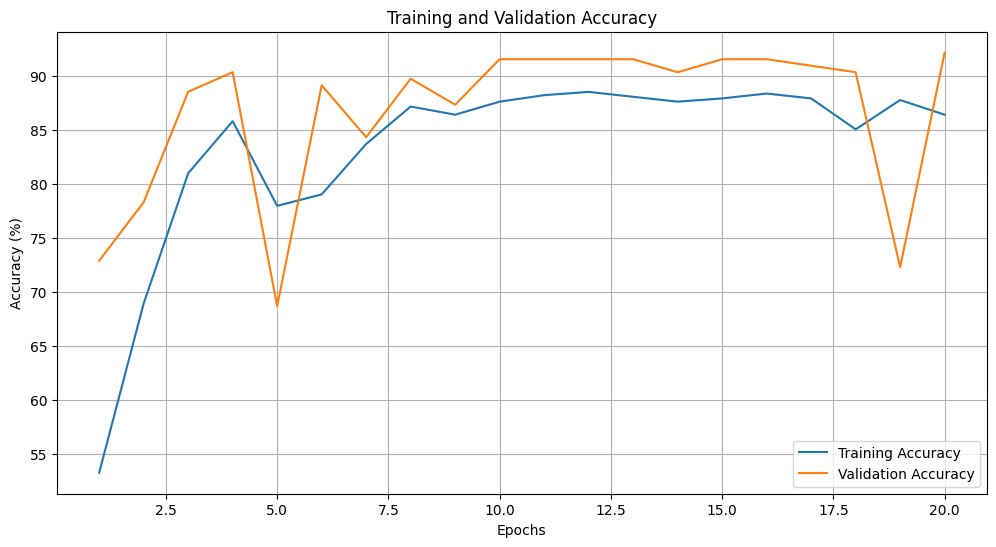

In [36]:
import matplotlib.pyplot as plt

# Visualization of training and validation metrics
def plot_training_history(history):
    epochs = range(1, len(history["train_loss"]) + 1)

    # Plot Training and Validation Loss
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, history["train_loss"], label="Training Loss")
    plt.plot(epochs, history["val_loss"], label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.grid()
    plt.show()

    # Plot Training and Validation Accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(epochs, history["train_accuracy"], label="Training Accuracy")
    plt.plot(epochs, history["val_accuracy"], label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy (%)")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Call the visualization function
plot_training_history(history)

#### overfitting
# increase dropout rate

In [37]:
# increase dropout rate
model2 = LSTM_tuned(
    input_size=1,
    hidden_size=best_combination["hidden_size"],
    num_layers=best_combination["num_layers"],
    dropout_rate=0.3
)

model2.to(device)

LSTM_tuned(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=32, out_features=3, bias=True)
  (log_softmax): LogSoftmax(dim=1)
)

In [38]:
num_epochs = 20
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_one_epoch(epoch)
    val_loss, val_accuracy = validate_one_epoch()
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_accuracy"].append(train_accuracy)
    history["val_accuracy"].append(val_accuracy)

Epoch: 1
Training Loss: 0.2903, Training Accuracy: 88.39%
Validation Loss: 0.2527, Validation Accuracy: 90.96%
Epoch: 2
Training Loss: 0.2942, Training Accuracy: 88.24%
Validation Loss: 0.2529, Validation Accuracy: 90.36%
Epoch: 3
Training Loss: 0.2751, Training Accuracy: 89.14%
Validation Loss: 0.2447, Validation Accuracy: 90.36%
Epoch: 4
Training Loss: 0.2800, Training Accuracy: 89.59%
Validation Loss: 0.2662, Validation Accuracy: 90.96%
Epoch: 5
Training Loss: 0.2454, Training Accuracy: 90.20%
Validation Loss: 0.2385, Validation Accuracy: 90.96%
Epoch: 6
Training Loss: 0.2622, Training Accuracy: 90.05%
Validation Loss: 0.3235, Validation Accuracy: 87.35%
Epoch: 7
Training Loss: 0.4120, Training Accuracy: 84.31%
Validation Loss: 0.2843, Validation Accuracy: 91.57%
Epoch: 8
Training Loss: 0.4249, Training Accuracy: 87.18%
Validation Loss: 1.0026, Validation Accuracy: 78.31%
Epoch: 9
Training Loss: 0.3680, Training Accuracy: 86.58%
Validation Loss: 0.2739, Validation Accuracy: 89.16%
E

Test Loss: 0.3130
Test Accuracy: 90.36%
Test F1 Score: 0.9022


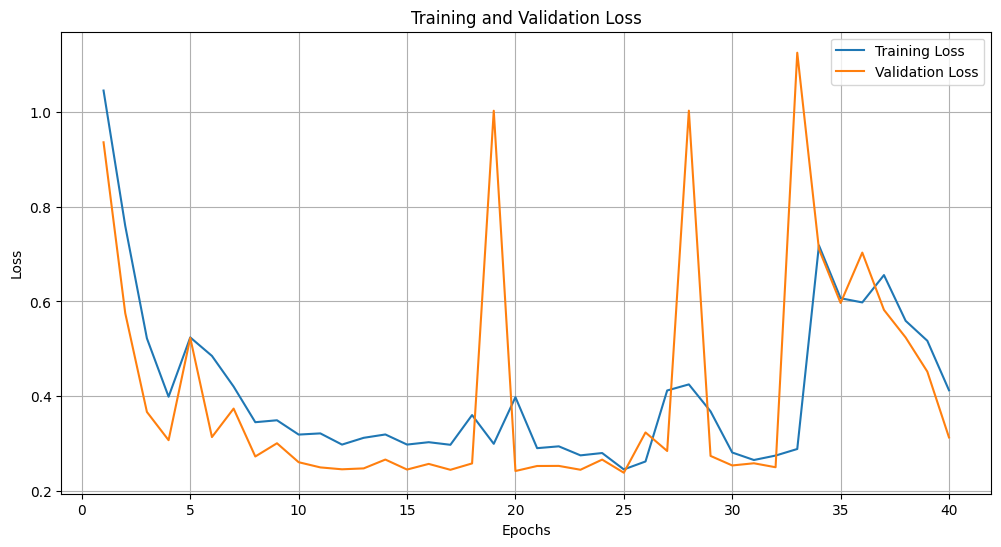

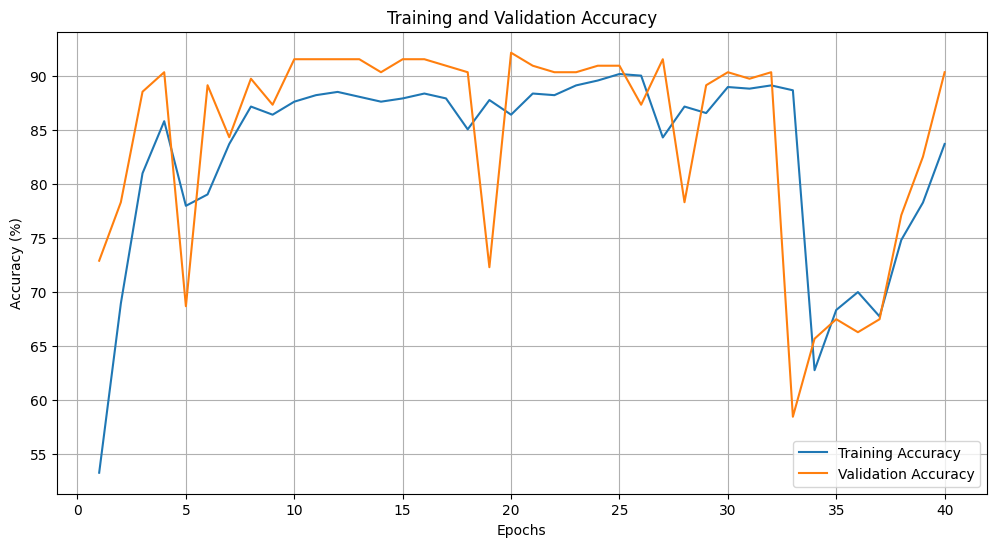

In [40]:
# final evalution
def test_model2_with_f1():
    model2.eval()
    correct_predictions = 0
    total_samples = 0
    running_loss = 0

    all_targets = []
    all_predictions = []

    with torch.no_grad():
        for x_batch, y_batch in test_loader:
            x_batch = x_batch.to(device)
            y_batch = y_batch.to(device)
            y_batch = y_batch.type(torch.LongTensor).squeeze(1).to(device)

            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()

            _, predicted_labels = torch.max(output, 1)
            correct_predictions += (predicted_labels == y_batch).sum().item()
            total_samples += y_batch.size(0)

            # Collect targets and predictions for F1 score
            all_targets.extend(y_batch.cpu().numpy())
            all_predictions.extend(predicted_labels.cpu().numpy())

    avg_loss = running_loss / len(test_loader)
    accuracy = (correct_predictions / total_samples) * 100

    # Calculate F1 Score
    f1 = f1_score(all_targets, all_predictions, average="weighted")  # Weighted for imbalanced classes

    print(f"Test Loss: {avg_loss:.4f}")
    print(f"Test Accuracy: {accuracy:.2f}%")
    print(f"Test F1 Score: {f1:.4f}")

# Run final test
test_model2_with_f1()
plot_training_history(history)

In [ ]:
# both training and validation accuracy
# potential reason is model is not complex enough,
# solution:
# add one more layer or switch to bidirectional LSTMs

In [44]:
# add one more layer
class DeepLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout_rate=0.3):
        super(DeepLSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate
        )


        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):

        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))

        out = self.fc(out[:, -1, :])
        return out

model = DeepLSTM(
    input_size=1,
    hidden_size=64,
    num_classes=3,
    num_layers=3,
    dropout_rate=0.3
)

model.to(device)


DeepLSTM(
  (lstm): LSTM(1, 64, num_layers=3, batch_first=True, dropout=0.3)
  (fc): Linear(in_features=64, out_features=3, bias=True)
)

In [46]:
loss_function = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
num_epochs = 20

Epoch: 1
Training Loss: 0.8712, Training Accuracy: 56.11%
Validation Loss: 0.6407, Validation Accuracy: 68.07%
Epoch: 2
Training Loss: 0.6490, Training Accuracy: 73.60%
Validation Loss: 0.3876, Validation Accuracy: 87.95%
Epoch: 3
Training Loss: 0.5539, Training Accuracy: 79.49%
Validation Loss: 0.6340, Validation Accuracy: 72.29%
Epoch: 4
Training Loss: 0.5696, Training Accuracy: 76.62%
Validation Loss: 0.3793, Validation Accuracy: 87.35%
Epoch: 5
Training Loss: 0.4034, Training Accuracy: 84.77%
Validation Loss: 0.2797, Validation Accuracy: 90.96%
Epoch: 6
Training Loss: 0.3493, Training Accuracy: 87.18%
Validation Loss: 0.2599, Validation Accuracy: 90.36%
Epoch: 7
Training Loss: 0.3474, Training Accuracy: 87.78%
Validation Loss: 0.2548, Validation Accuracy: 90.96%
Epoch: 8
Training Loss: 0.3509, Training Accuracy: 86.12%
Validation Loss: 0.2724, Validation Accuracy: 90.96%
Epoch: 9
Training Loss: 0.3893, Training Accuracy: 86.88%
Validation Loss: 0.2500, Validation Accuracy: 90.96%
E

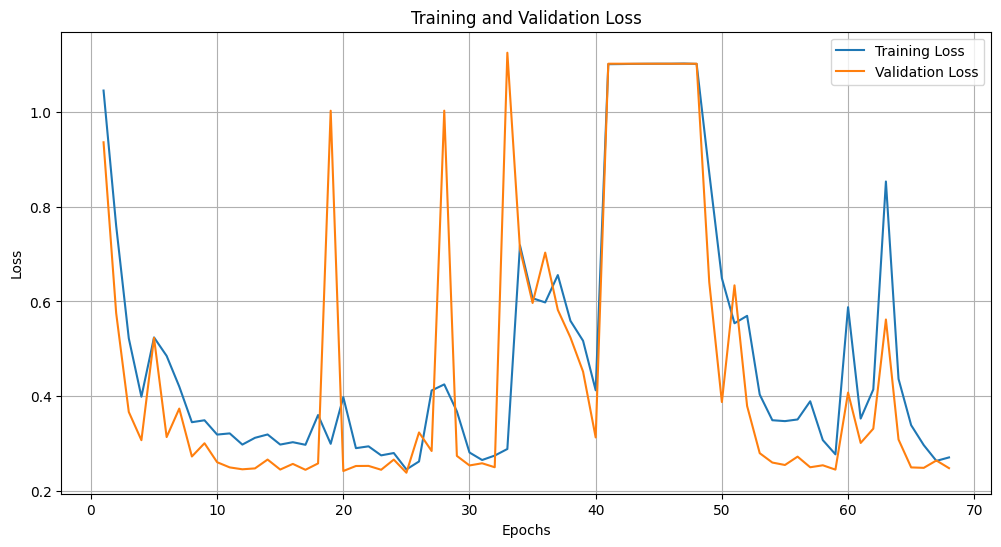

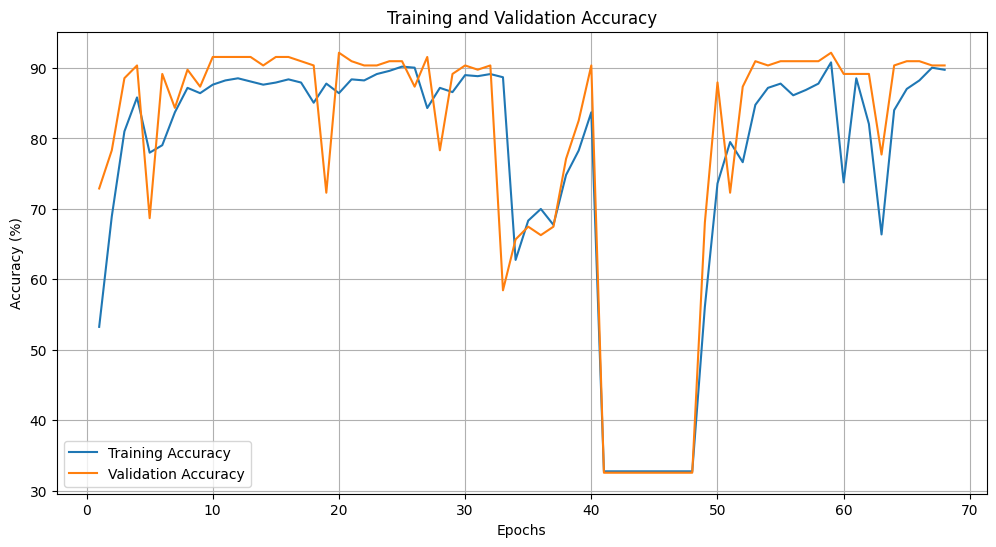

In [47]:
for epoch in range(num_epochs):
    train_loss, train_accuracy = train_one_epoch(epoch)
    val_loss, val_accuracy = validate_one_epoch()
    history["train_loss"].append(train_loss)
    history["val_loss"].append(val_loss)
    history["train_accuracy"].append(train_accuracy)
    history["val_accuracy"].append(val_accuracy)

test_model_with_f1()

In [49]:
test_model_with_f1()

Test Loss: 0.2481
Test Accuracy: 90.36%
Test F1 Score: 0.9021


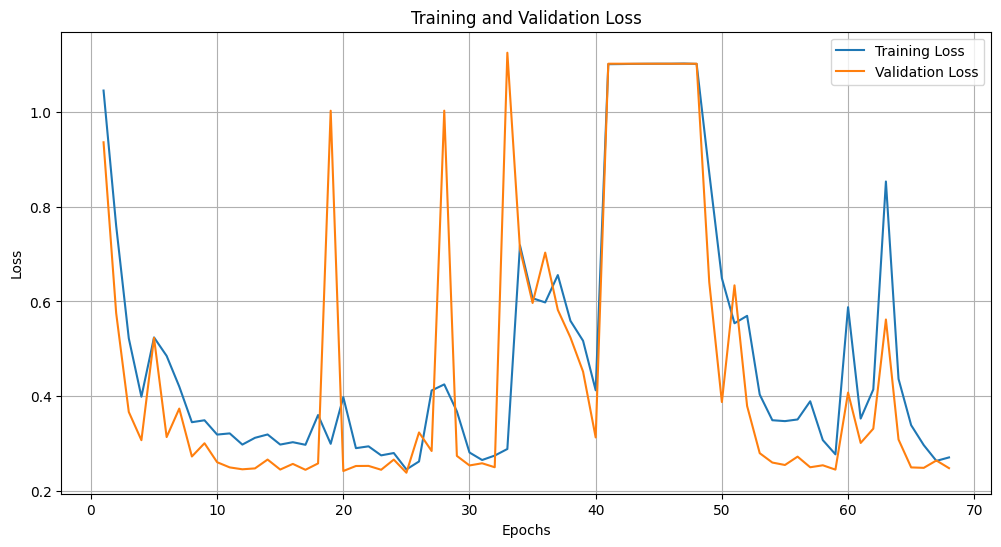

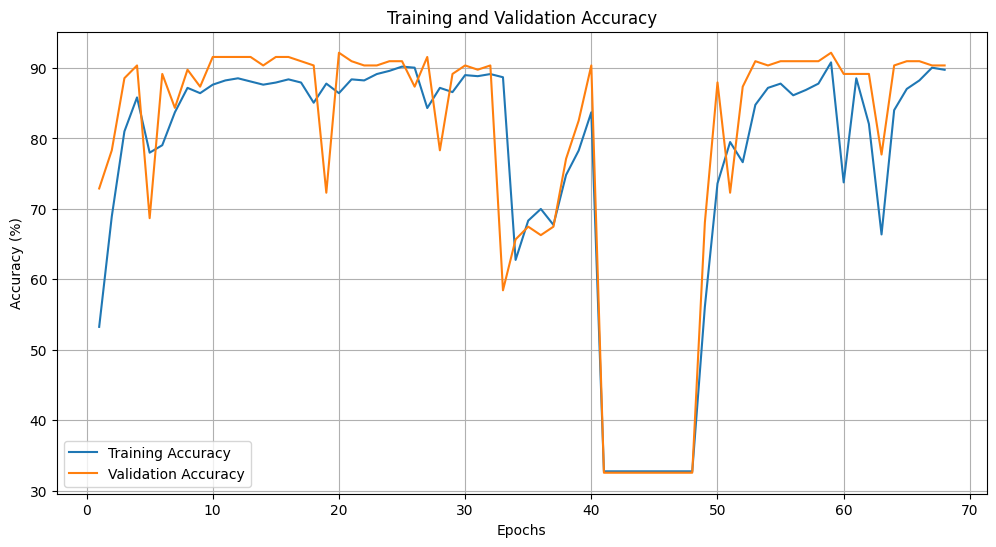

In [48]:
plot_training_history(history)